# Simple Autoencoder for MNIST 
#### Objective: 
Learn about dimensionality reduction and reconstruction
#### Tasks: 
1. Build an autoencoder for MNIST digits
2. Visualize encoded representations
3. Experiment with different latent dimensions
#### Skills: 
Autoencoders, image processing

## Step 1: Load and Preprocess MNIST Data

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


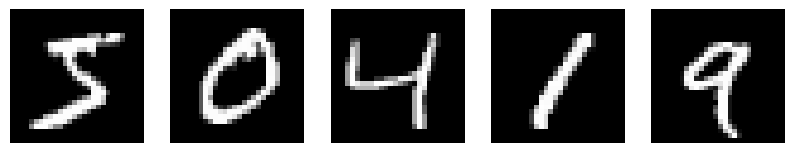

Train shape: (60000, 28, 28, 1), Test shape: (10000, 28, 28, 1)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize images to range [0,1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape data for neural network input (Flattening)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Display sample images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    axes[i].imshow(x_train[i].reshape(28, 28), cmap='gray')
    axes[i].axis('off')

plt.show()

# Print dataset shape
print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")


## Step 2: Build and Train the Autoencoder

1. Encoder: Convolutional layers to extract features and reduce dimensionality.
2. Bottleneck: A latent space representation of the image.
3. Decoder: Convolutional layers to reconstruct the image from the latent space.

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# Encoder
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Save the trained model
autoencoder.save("mnist_autoencoder.h5")

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - loss: 0.3414 - val_loss: 0.0990
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - loss: 0.0958 - val_loss: 0.0859
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - loss: 0.0855 - val_loss: 0.0812
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - loss: 0.0814 - val_loss: 0.0786
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - loss: 0.0790 - val_loss: 0.0772
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - loss: 0.0778 - val_loss: 0.0758
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - loss: 0.0766 - val_loss: 0.0751
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - loss: 0.0757 - val_loss: 0.0744
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - loss: 0.0751 - val_loss: 0.0737
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - loss: 0.0744 - val_loss: 0.0733


## Step 3: Visualize Encoded Representations and Reconstructed Images

1. Original vs. Reconstructed Images to see how well the autoencoder is performing.
2. Encoded Representations (compressed latent features).

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


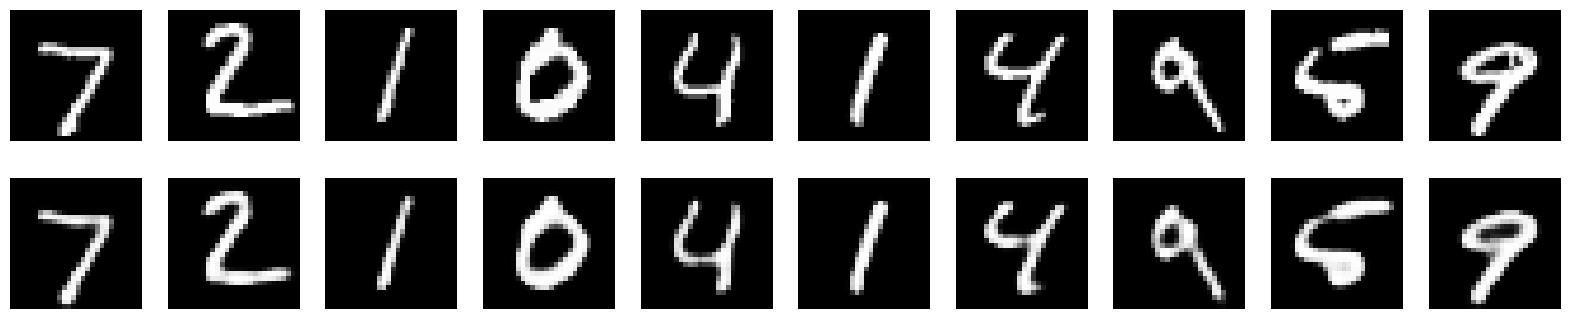

In [3]:
import matplotlib.pyplot as plt

# Get reconstructed images
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

plt.show()

## Step 4: Experiment with Different Latent Dimensions

In [4]:
from tensorflow.keras.layers import Flatten, Dense, Reshape

# Encoder
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
encoded = Dense(16, activation='relu')(x)  # Change 16 to different dimensions (e.g., 2, 8, 32)

# Decoder
x = Dense(7*7*16, activation='relu')(encoded)
x = Reshape((7, 7, 16))(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train with the new latent space size
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - loss: 0.3591 - val_loss: 0.1669
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.1564 - val_loss: 0.1371
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - loss: 0.1369 - val_loss: 0.1296
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - loss: 0.1301 - val_loss: 0.1258
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - loss: 0.1263 - val_loss: 0.1227
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - loss: 0.1236 - val_loss: 0.1204
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - loss: 0.1213 - val_loss: 0.1188
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - loss: 0.1191 - val_loss: 0.1169
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - loss: 0.1179 - val_loss: 0.1156
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - loss: 0.1164 - val_loss: 0.1141


## Step 5: Visualize Reconstruction for Different Latent Dimensions

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


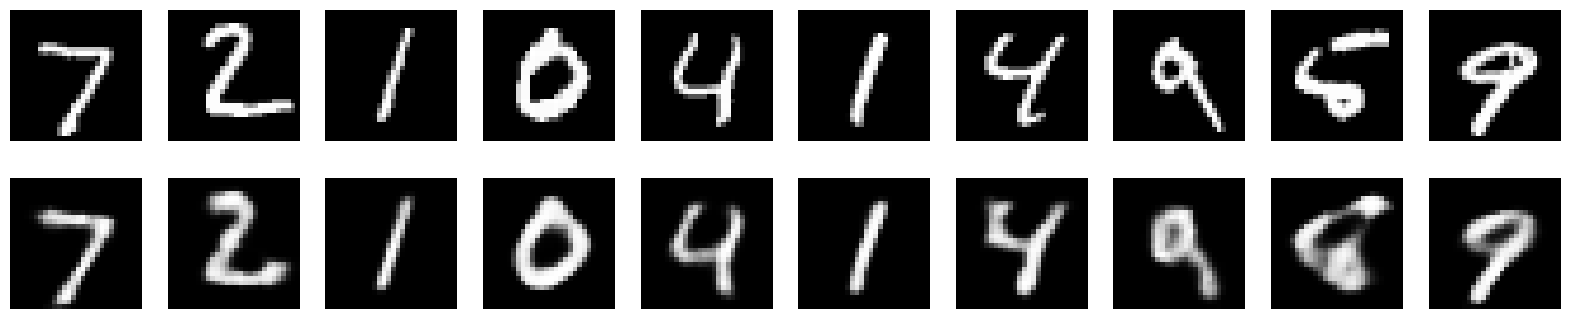

In [5]:
import matplotlib.pyplot as plt

# Generate reconstructed images
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

plt.show()

## 1. Denoising Autoencoder
#### Goal: 

-Train the autoencoder to remove noise from images.

#### How:
- Add random noise to the MNIST dataset (e.g., Gaussian noise or salt-and-pepper noise).
  
- Train the autoencoder to reconstruct the clean images from noisy inputs.
  
#### Benefit:
- Helps in image denoising applications.

#### Steps to Build a Denoising Autoencoder
1. Add Noise to the MNIST Dataset
2. Introduce Gaussian noise or salt-and-pepper noise to the images.
3. Modify the Autoencoder Model
The encoder remains the same.
The decoder reconstructs the original image from the noisy input.
4. Train the Model
5. Input: Noisy images
6. Target: Clean images
7. Test the Model
8. Compare noisy images vs. reconstructed images.

##  Load and Preprocess MNIST

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model

# Load MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize to range [0,1]
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

## Add Noise to the Images

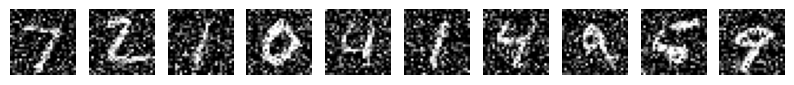

In [7]:
# Add Gaussian noise
noise_factor = 0.4  # Control noise level
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip values to keep them in the [0,1] range
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Visualize noisy images
n = 10
plt.figure(figsize=(10, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
plt.show()


## Build the Denoising Autoencoder

In [8]:
# Encoder
input_img = Input(shape=(28, 28, 1))
encoded = Flatten()(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(28 * 28, activation='sigmoid')(decoded)
decoded = Reshape((28, 28, 1))(decoded)

# Define autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train,  
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3376 - val_loss: 0.1865
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1795 - val_loss: 0.1592
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1574 - val_loss: 0.1483
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1465 - val_loss: 0.1407
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1399 - val_loss: 0.1356
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1349 - val_loss: 0.1315
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1316 - val_loss: 0.1294
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1291 - val_loss: 0.1273
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1270 - val_loss: 0.1250
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1253 - val_loss: 0.1236


## Test the Denoising Autoencoder

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


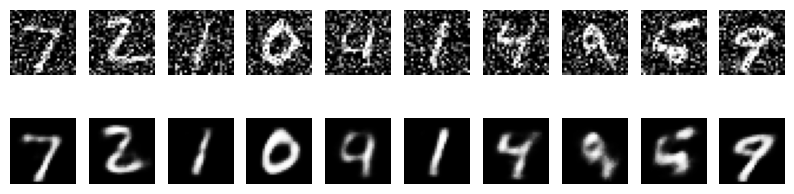

In [9]:
# Get the reconstructed (denoised) images
decoded_imgs = autoencoder.predict(x_test_noisy)

# Visualize results
n = 10
plt.figure(figsize=(10, 4))
for i in range(n):
    # Noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
    
    # Denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

plt.show()


## Experiment with Different Noise Types (Salt-and-Pepper Noise)

1. Add salt-and-pepper noise to the MNIST dataset.
2. Train the autoencoder to reconstruct the clean images.

In [10]:
import numpy as np

def add_salt_and_pepper_noise(images, noise_level=0.2):
    noisy_images = images.copy()
    num_pixels = int(noise_level * images.shape[1] * images.shape[2])
    
    for img in noisy_images:
        # Add salt (white pixels)
        coords = [np.random.randint(0, images.shape[1], num_pixels),
                  np.random.randint(0, images.shape[2], num_pixels)]
        img[coords[0], coords[1]] = 1
        
        # Add pepper (black pixels)
        coords = [np.random.randint(0, images.shape[1], num_pixels),
                  np.random.randint(0, images.shape[2], num_pixels)]
        img[coords[0], coords[1]] = 0

    return noisy_images

# Apply noise to MNIST test images
x_train_noisy = add_salt_and_pepper_noise(x_train)
x_test_noisy = add_salt_and_pepper_noise(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


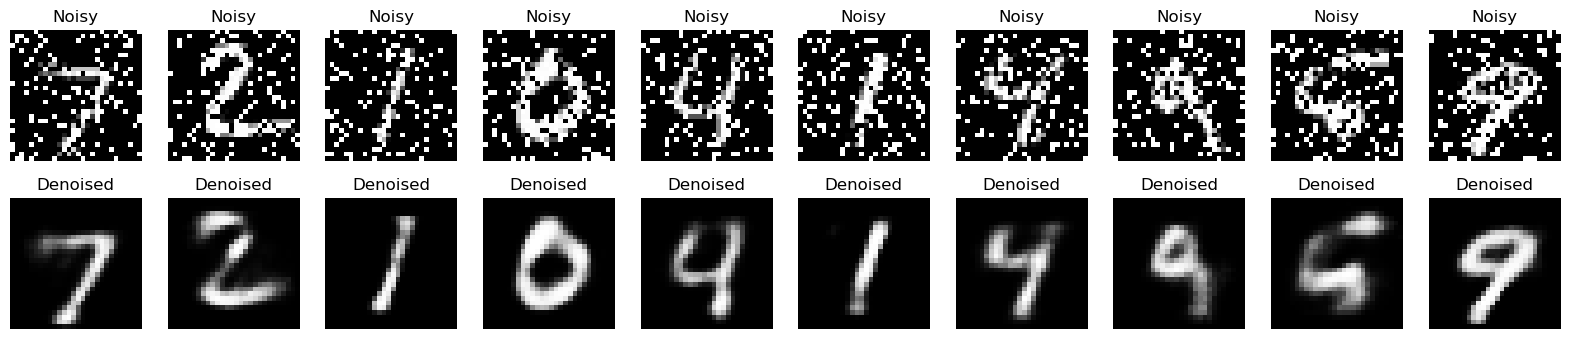

In [11]:
import matplotlib.pyplot as plt

# Get reconstructed images
decoded_imgs = autoencoder.predict(x_test_noisy)

# Number of images to display
n = 10  

plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.title("Noisy")
    
    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.title("Denoised")

plt.show()


## Improve Model Performance Using CNNs Instead of Dense Layers

#### Why CNNs?

1. Better spatial feature extraction.
2. Captures patterns more effectively than Dense layers.

#### Steps:
1. Replace the encoder-decoder architecture with convolutional layers.
2. Use Conv2D and UpSampling2D instead of Dense layers.

In [12]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model, Sequential

# Encoder
encoder = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same')
])

# Decoder
decoder = Sequential([
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

# Build Model
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train Model
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/10


C:\Users\itsme\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 0.2291 - val_loss: 0.0810
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.0801 - val_loss: 0.0754
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.0757 - val_loss: 0.0733
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.0737 - val_loss: 0.0720
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - loss: 0.0724 - val_loss: 0.0709
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.0714 - val_loss: 0.0705
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - loss: 0.0706 - val_loss: 0.0695
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.0700 - val_loss: 0.0690
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.0695 - val_loss: 0.0686
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - loss: 0.0690 - val_loss: 0.0684


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


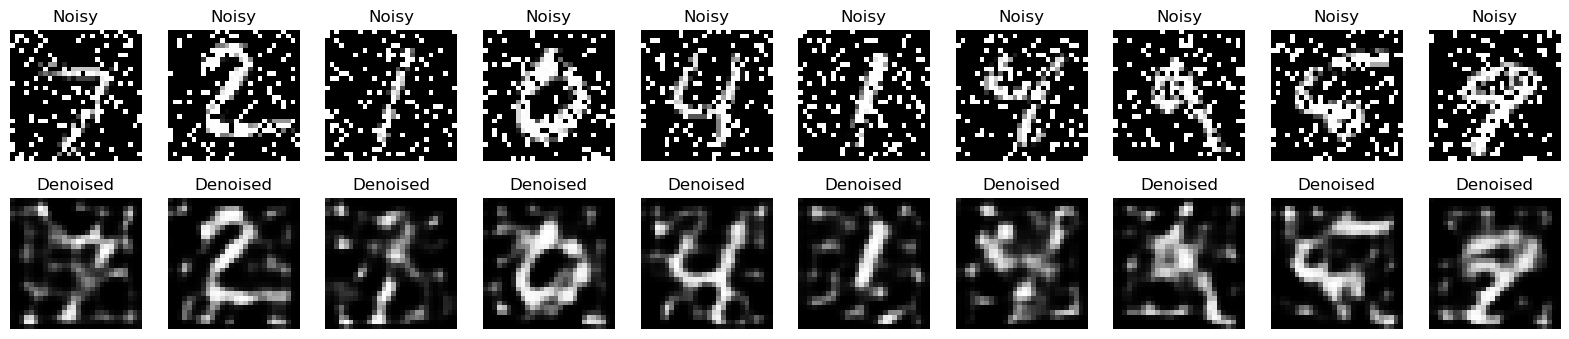

In [13]:
import matplotlib.pyplot as plt

# Predict denoised images
decoded_imgs = autoencoder.predict(x_test_noisy)

# Number of images to display
n = 10  

plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.title("Noisy")
    
    # Display reconstructed (denoised) images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.title("Denoised")

plt.show()


## Train on a Larger Dataset (Fashion-MNIST)

#### Why Fashion-MNIST?

1. More complex than MNIST (clothing items instead of digits).
2. Great for real-world applications.

#### Steps:
1. Load Fashion-MNIST dataset.
2. Preprocess it the same way as MNIST.
3. Train the autoencoder on Fashion-MNIST instead.

In [25]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [26]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model, Sequential

# Encoder
encoder = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same')
])

# Decoder
decoder = Sequential([
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

# Build Model
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train Model
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - loss: 0.3688 - val_loss: 0.2837
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.2788 - val_loss: 0.2762
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.2730 - val_loss: 0.2720
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.2698 - val_loss: 0.2696
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.2661 - val_loss: 0.2675
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.2645 - val_loss: 0.2657
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.2632 - val_loss: 0.2649
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - loss: 0.2619 - val_loss: 0.2632
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.2610 - val_loss: 0.2620
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - loss: 0.2601 - val_loss: 0.2613


## Evaluate Model Performance

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


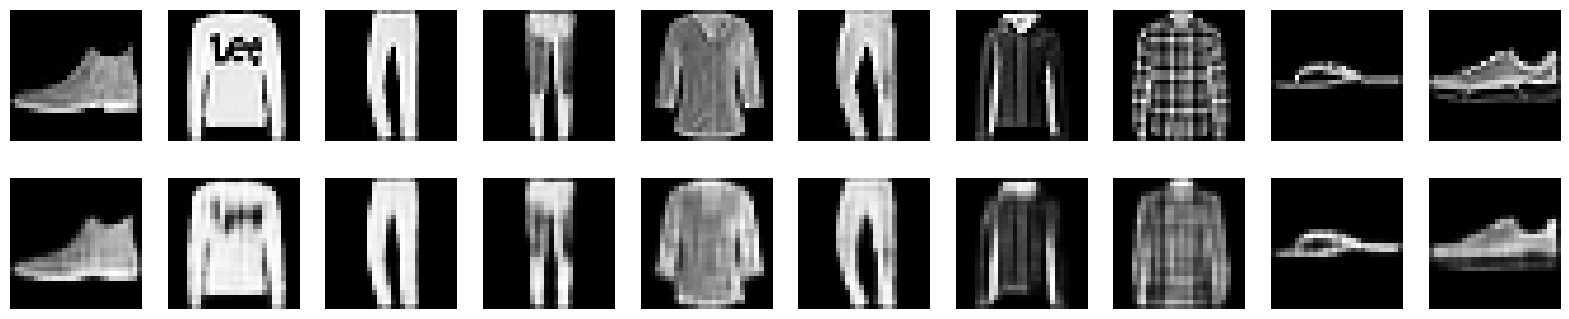

In [16]:
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test)

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

plt.show()

## Experiment with Different Latent Space Sizes

In [17]:
from tensorflow.keras.layers import Flatten, Dense, Reshape

# Modify Encoder
encoder = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Flatten(),
    Dense(32, activation='relu')  # Change 32 to a smaller/bigger value
])

# Modify Decoder
decoder = Sequential([
    Dense(7 * 7 * 16, activation='relu'),
    Reshape((7, 7, 16)),
    UpSampling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

autoencoder = Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

## Use t-SNE or PCA to Visualize Latent Space

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


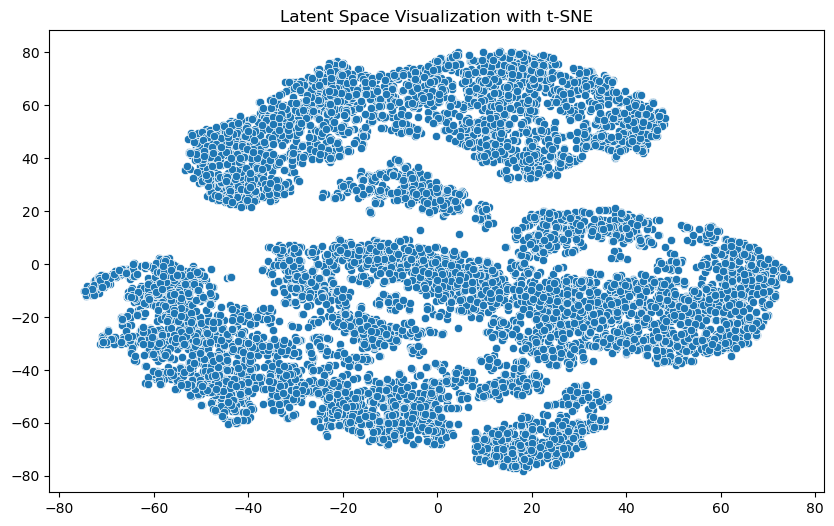

In [18]:
from sklearn.manifold import TSNE
import seaborn as sns

# Get latent space representation
latent_representations = encoder.predict(x_test)

# Reduce to 2D
tsne = TSNE(n_components=2)
latent_2d = tsne.fit_transform(latent_representations)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=latent_2d[:, 0], y=latent_2d[:, 1])
plt.title("Latent Space Visualization with t-SNE")
plt.show()

 ## Apply Transfer Learning to a New Task

In [27]:
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize images to range [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Expand dimensions to match CNN input (28,28,1)
x_train = x_train[..., None]
x_test = x_test[..., None]


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Freeze the encoder
encoder.trainable = False

# Add a classification head
classifier = Sequential([
    encoder, 
    Flatten(),  # Flatten 4D output (7,7,filters) → 1D vector
    Dense(10, activation='softmax')  # Output layer for classification
])

# Compile model
classifier.compile(optimizer='adam', 
                   loss='sparse_categorical_crossentropy', 
                   metrics=['accuracy'])

# Train on labeled Fashion-MNIST data
classifier.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7506 - loss: 0.7227 - val_accuracy: 0.8444 - val_loss: 0.4348
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8537 - loss: 0.4111 - val_accuracy: 0.8595 - val_loss: 0.3972
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8625 - loss: 0.3775 - val_accuracy: 0.8549 - val_loss: 0.3957
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8676 - loss: 0.3635 - val_accuracy: 0.8706 - val_loss: 0.3668
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8745 - loss: 0.3504 - val_accuracy: 0.8651 - val_loss: 0.3688
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8786 - loss: 0.3360 - val_accuracy: 0.8661 - val_loss: 0.3689
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8812 - loss: 0.3360 - val_accuracy: 0.8689 - val_loss: 0.3616
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8821 - loss: 0.3290 - 

##  Fine-Tune the Classifier 

In [30]:
# Unfreeze the last few layers of the encoder
for layer in encoder.layers[-5:]:  # Unfreeze last 5 layers
    layer.trainable = True

# Recompile model after changing trainable layers
classifier.compile(optimizer='adam', 
                   loss='sparse_categorical_crossentropy', 
                   metrics=['accuracy'])

# Train again (fine-tuning)
classifier.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8851 - loss: 0.3194 - val_accuracy: 0.8758 - val_loss: 0.3496
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8947 - loss: 0.2918 - val_accuracy: 0.8891 - val_loss: 0.3111
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8979 - loss: 0.2795 - val_accuracy: 0.8835 - val_loss: 0.3240
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9034 - loss: 0.2663 - val_accuracy: 0.8829 - val_loss: 0.3210
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9056 - loss: 0.2586 - val_accuracy: 0.8897 - val_loss: 0.3218


## Evaluate Classifier Performance 

In [31]:
test_loss, test_acc = classifier.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8890 - loss: 0.3237
Test Accuracy: 0.8897


## Compare Performance: CNN Classifier vs. Autoencoder + Classifier 

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a normal CNN classifier (not using encoder)
cnn_classifier = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_classifier.compile(optimizer='adam', 
                       loss='sparse_categorical_crossentropy', 
                       metrics=['accuracy'])

# Train the CNN classifier
cnn_classifier.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7696 - loss: 0.6360 - val_accuracy: 0.8575 - val_loss: 0.3898
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8854 - loss: 0.3143 - val_accuracy: 0.8780 - val_loss: 0.3272
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9041 - loss: 0.2584 - val_accuracy: 0.8965 - val_loss: 0.2883
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9173 - loss: 0.2277 - val_accuracy: 0.9026 - val_loss: 0.2636
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9272 - loss: 0.1936 - val_accuracy: 0.9072 - val_loss: 0.2527
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9365 - loss: 0.1715 - val_accuracy: 0.9057 - val_loss: 0.2674
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9436 - loss: 0.1510 - val_accuracy: 0.9074 - val_loss: 0.2688
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9467 - loss: 0

## Visualize Features from Encoder 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


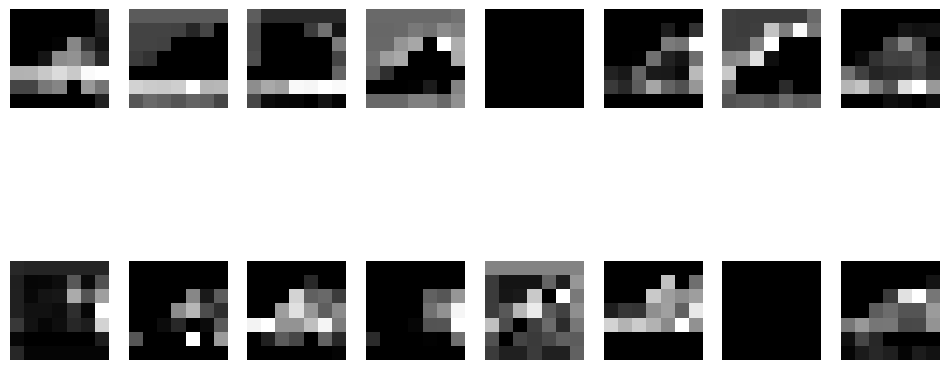

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Pick a test image
sample_image = np.expand_dims(x_test[0], axis=0)  # Add batch dimension

# Get feature maps from encoder
feature_maps = encoder.predict(sample_image)

# Get the number of feature maps (channels)
num_filters = feature_maps.shape[-1]  # Dynamically get the number of filters

# Plot feature maps
fig, axes = plt.subplots(2, num_filters//2, figsize=(12, 6))  # Adjust grid size
axes = axes.flatten()
for i in range(num_filters):  # Loop through available filters
    axes[i].imshow(feature_maps[0, :, :, i], cmap='gray')
    axes[i].axis('off')

plt.show()


### THANK YOU